In [10]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

In [11]:
# we used OpenCv to import the image
image = cv2.imread('C:/Users/dell/OneDrive/Desktop/University_Courses/Machine Learning Projects/Sports Celebrity Classifier/test_images/sharapova1.jpeg')
image.shape

(191, 264, 3)

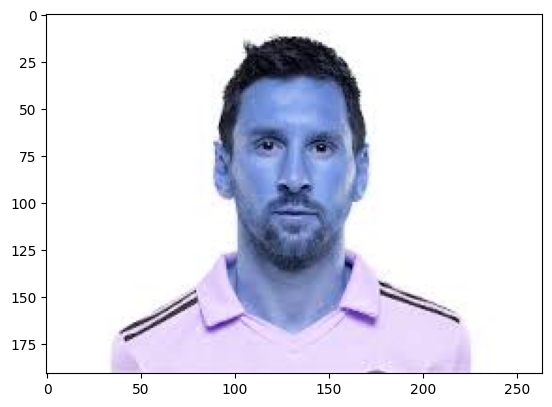

In [12]:
plt.imshow(image)


In [13]:
# we convert the image to grey Processing a gray since gray image requires less computational resources because there's less data to process,
# making the algorithm faster and more efficient, especially on large datasets or when using simpler or older hardware.
# in addition to feature simplification and model training efficiency, which will be faster
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape


#The color intensity at each pixel in a grayscale image is represented by a single number that ranges from 0 to 255
# the shape below represent the height and width of the image


(191, 264)

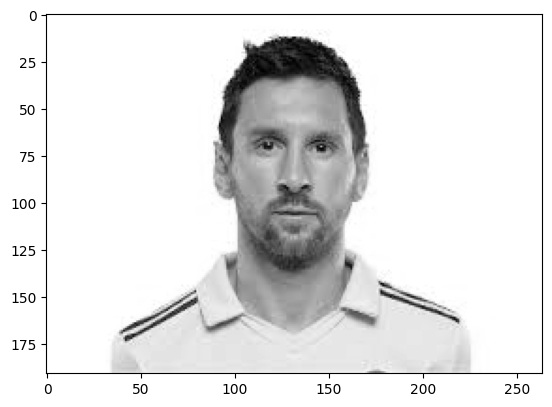

In [14]:
plt.imshow(gray, cmap = 'gray')

In [15]:
#In OpenCV, CascadeClassifier objects such as faceCascade and eyeCascade are used for object detection,
# specifically for detecting faces and eyes in images or video streams.

#faceCascade and eyeCascade are the objects of cascade classifier
faceCascade = cv2.CascadeClassifier('C:/Users/dell/OneDrive/Desktop/University_Courses/Machine Learning Projects/Sports Celebrity Classifier/opencv/haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier('C:/Users/dell/OneDrive/Desktop/University_Courses/Machine Learning Projects/Sports Celebrity Classifier/opencv/haarcascade_eye.xml')


#Simplified, the process is like looking through a magnifying glass that can zoom out (scaleFactor). 
# You're scanning across the picture (Sliding Window),
#looking closely at each spot to see if it's part of a face or eye

# 1.3 : scaleFactor, is the factor by which the image is scaled down
# 5 :  This is like asking for a minimum amount of agreement before deciding there's actually a face or eye there. 
# If at least 5 zones nearby also think there's a face, then it's likely true. This helps avoid mistakes.

faces = faceCascade.detectMultiScale(gray,1.3,5)

faces

array([[87, 34, 90, 90]])

In [16]:
(x,y,w,h) = faces[0]

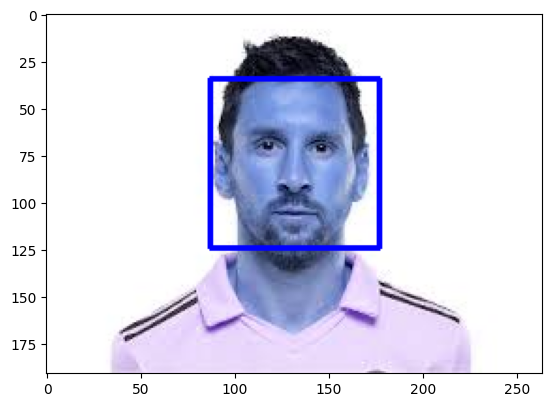

In [17]:
# draw a rectangle around the face
# x: The x-coordinate of the upper-left corner of the rectangle.
# This value represents the horizontal position of the rectangle's starting point from the left side of the image.

# y: The y-coordinate of the upper-left corner of the rectangle.
# This value represents the vertical position of the rectangle's starting point from the top of the image.

# w (width): The width of the rectangle. 
# h (height): The height of the rectangle. 

# (0,0,255): The color of the rectangle.
# 2 : The thickness of the rectangle.
face_image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

plt.imshow(face_image)

In [27]:
eyes = eyeCascade.detectMultiScale(gray,1.3,5)

eyes


array([[87, 34, 90, 90]])

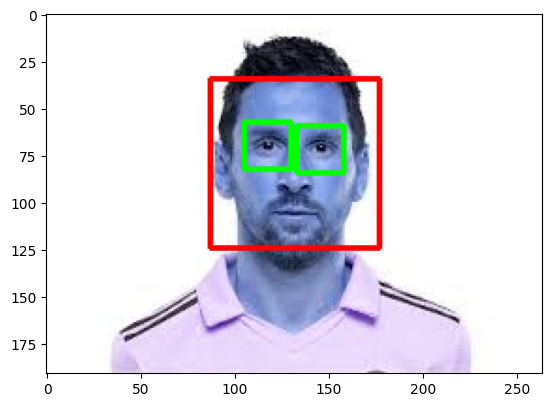

In [19]:
cv2.destroyAllWindows()  # Closes all OpenCV windows that might be open.

for (x,y,w,h) in faces:  # Loops through each face detected in the 'faces' list.
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 2)  # Draws a rectangle around the detected face on the 'image' with a blue color (255,0,0) and thickness of 2.

    roi_gray = gray[y:y+h, x:x+w]  # roi : is the area of interest we need to focus on in the grayscale image.
    roi_color = image[y:y+h, x:x+w]  # Extracts the ROI for the face from the original colored image for display purposes.

    eyes = eyeCascade.detectMultiScale(roi_gray)  # Detects eyes within the ROI of the grayscale image using the Haar cascade classifier previously loaded.

    for (ex,ey,ew,eh) in eyes:  # Loops through each pair of eyes detected in the ROI.
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)  # Draws a rectangle around the detected eyes on the ROI of the original colored image with a green color (0,255,0) and thickness of 2.

plt.figure()  # Creates a new figure for plotting.
plt.imshow(face_image, cmap = 'gray')  # Displays 'face_image' in the created figure using a grayscale colormap.


plt.show()  # Displays the figure with the image to the screen.


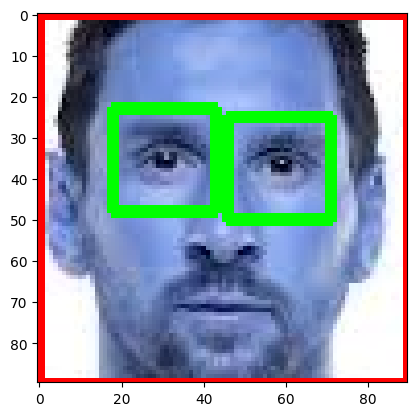

In [20]:
#  display an image segment (ROI - Region of Interest, likely a detected face or object) using Matplotlib
plt.imshow(roi_color, cmap = 'gray')

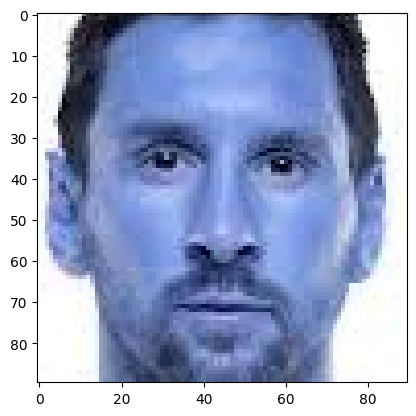

In [30]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)  # Reads the image from the specified path using OpenCV.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converts the read image to grayscale for face detection.
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)  # Detects faces in the grayscale image using a Haar cascade classifier.
    
    for (x,y,w,h) in faces:  # Iterates through all detected faces in the image.
        roi_gray = gray[y:y+h, x:x+w]  # Extracts the region of interest (ROI) for the face from the grayscale image.
        roi_color = img[y:y+h, x:x+w]  # Extracts the ROI for the face from the original (colored) image.
        eyes = eyeCascade.detectMultiScale(roi_gray)  # Detects eyes within the grayscale ROI using a Haar cascade classifier.
        
        if len(eyes) >= 2:  # Checks if there are two or more detected eyes within the ROI.
            return roi_color  # Returns the cropped color image of the face with two or more eyes.

# The function is then used to get a cropped image of a face from a specific image path, if that face has two or more eyes detected.
original_image = get_cropped_image_if_2_eyes('C:/Users/dell/OneDrive/Desktop/University_Courses/Machine Learning Projects/Sports Celebrity Classifier/test_images/sharapova1.jpeg')

plt.imshow(original_image)  # Displays the cropped image using matplotlib.


In [22]:
path_to_dataset = "./Dataset/"

path_to_cr_data = "./Dataset/cropped/"

In [23]:
import os  # Imports the os module, which provides functions for interacting with the operating system.

img_dirs = []  # Initializes an empty list to store the paths of image directories.

for entry in os.scandir(path_to_dataset):  # Loops through entries (files) in the directory specified by 'path_to_dataset'.
    if entry.is_dir():  # Checks if the current entry is a directory.
        img_dirs.append(entry.path)  # Adds the path of the directory to the 'img_dirs' list.


In [32]:
img_dirs


['./Dataset/cropped',
 './Dataset/lionel_messi',
 './Dataset/maria_sharapova',
 './Dataset/roger_federer',
 './Dataset/serena_williams',
 './Dataset/virat_kohli']

In [25]:
# this code is used to ensure that we will not create directories(folders) if they exist, each time we run the code.

import shutil  # Imports the shutil module, which offers a number of high-level operations on files and collections of files. 
#In this context, it's used for removing a directory tree.

if os.path.exists(path_to_cr_data):  # Checks if the directory specified by 'path_to_cr_data' already exists.
    shutil.rmtree(path_to_cr_data)  # Deletes the entire directory tree at 'path_to_cr_data'.This includes all files and sub-directories contained within it.

os.mkdir(path_to_cr_data)  # Creates a new directory at the specified path 'path_to_cr_data'.


In [26]:
cropped_image_dir = []  # Initializes a list to keep track of directories where cropped images are stored.
celebrity_file_name_dict = {}  # Initializes a dictionary to map celebrity names to lists of their cropped image file paths.
celebrity_file_name_directory = []  # Initializes a list to keep track of directories where celebrity cropped images are stored.

for img_dir in img_dirs:  # Iterates over each directory in 'img_dirs', which contains paths to image directories.
    count = 1  # Initializes a counter to uniquely name cropped images for a celebrity.
    celebrity_name = img_dir.split('/')[-1]  # Extracts the celebrity name from the directory path.
    print(celebrity_name)  # Prints the celebrity name.

    for entry in os.scandir(img_dir):  # Iterates over each file in the current image directory.
        celebrity_file_name_dict[celebrity_name] = []  # Resets the list of file paths for the current celebrity in the dictionary. This line should likely be outside the loop to avoid resetting for each image.
        
        roi_color = get_cropped_image_if_2_eyes(entry.path)  # Tries to get a cropped image with two eyes detected from the current image file.
        
        # If a cropped image is obtained (face with two eyes detected), proceed to save it.
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name  # Specifies the path to a folder for the current celebrity's cropped images.
            
            # If the folder doesn't exist, create it and add its path to 'cropped_image_dir'.
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dir.append(cropped_folder)
                print("Generating cropped image in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"  # Defines a unique file name for the cropped image.
            cropped_file_path = cropped_folder + "/" + cropped_file_name  # Specifies the full path for the cropped image file.
            
            cv2.imwrite(cropped_file_path, roi_color)  # Saves the cropped image to the specified file path.
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)  # Adds the file path to the list for the current celebrity in the dictionary.
            count += 1  # Increments the counter for the next image file name.


cropped
lionel_messi
Generating cropped image in folder:  ./Dataset/cropped/lionel_messi
maria_sharapova
Generating cropped image in folder:  ./Dataset/cropped/maria_sharapova
roger_federer
Generating cropped image in folder:  ./Dataset/cropped/roger_federer
serena_williams
Generating cropped image in folder:  ./Dataset/cropped/serena_williams
virat_kohli
Generating cropped image in folder:  ./Dataset/cropped/virat_kohli
